In [1]:
import os
import numpy as np
from skimage import io, color
from scipy.stats import kurtosis, skew, entropy
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from PIL import Image
import math

def get_media(imagem):
    largura, altura = imagem.size
    soma_pixel = 0
    pixels = imagem.load()

    if imagem.mode == 'RGB':
        for x in range(largura):
            for y in range(altura):
                pixel = pixels[x, y]
                soma_pixel += sum(pixel)
    elif imagem.mode == 'L':
        for x in range(largura):
            for y in range(altura):
                pixel = pixels[x, y]
                soma_pixel += pixel  # Imagem em tons de cinza tem apenas um valor de pixel

    media = soma_pixel / (largura * altura)

    return media


def get_variancia(imagem):
    largura, altura = imagem.size
    soma_pixel = 0
    soma_quadrados = 0
    pixels = imagem.load()
    
    if imagem.mode == 'RGB':
        for x in range(largura):
            for y in range(altura):
                pixel = pixels[x, y]
                soma_pixel += sum(pixel)
                soma_quadrados += sum(componente ** 2 for componente in pixel)
    elif imagem.mode == 'L':
        for x in range(largura):
            for y in range(altura):
                pixel = pixels[x, y]
                soma_pixel += pixel
                soma_quadrados += pixel ** 2

    media = soma_pixel / (largura * altura)
    variancia = (soma_quadrados / (largura * altura)) - (media ** 2)
    
    return variancia


def get_skewness(imagem):
    largura, altura = imagem.size
    soma_pixel = 0
    soma_quadrados = 0
    soma_cubo = 0
    pixels = imagem.load()

    if imagem.mode == 'RGB':
        for x in range(largura):
            for y in range(altura):
                pixel = pixels[x, y]
                soma_pixel += sum(pixel)
                soma_quadrados += sum(componente ** 2 for componente in pixel)
                soma_cubo += sum(componente ** 3 for componente in pixel)
    elif imagem.mode == 'L':
        for x in range(largura):
            for y in range(altura):
                pixel = pixels[x, y]
                soma_pixel += pixel
                soma_quadrados += pixel ** 2
                soma_cubo += pixel ** 3

    media = soma_pixel / (largura * altura)

    variancia = (soma_quadrados / (largura * altura)) - (media ** 2)

    skewness = (soma_cubo / (largura * altura)) - 3 * media * variancia - media ** 3

    return skewness


def get_kurtosis(imagem):

    largura, altura = imagem.size
    soma_pixel = 0
    soma_quadrados = 0
    soma_quarta_potencia = 0
    pixels = imagem.load()

    if imagem.mode == 'RGB':
        for x in range(largura):
            for y in range(altura):
                pixel = pixels[x, y]
                soma_pixel += sum(pixel)
                soma_quadrados += sum(componente ** 2 for componente in pixel)
                soma_quarta_potencia += sum(componente ** 4 for componente in pixel)
    elif imagem.mode == 'L':
        for x in range(largura):
            for y in range(altura):
                pixel = pixels[x, y]
                soma_pixel += pixel
                soma_quadrados += pixel ** 2
                soma_quarta_potencia += pixel ** 4
            
    media = soma_pixel / (largura * altura)

    variancia = (soma_quadrados / (largura * altura)) - (media ** 2)

    kurtosis = (soma_quarta_potencia / (largura * altura)) - 3 * (variancia ** 2)

    return kurtosis


def get_energia(imagem):
    largura, altura = imagem.size
    soma_quadrados = 0
    pixels = imagem.load()

    if imagem.mode == 'RGB':
        for x in range(largura):
            for y in range(altura):
                pixel = pixels[x, y]
                for componente in pixel:
                    soma_quadrados += componente ** 2
    elif imagem.mode == 'L':
        for x in range(largura):
            for y in range(altura):
                pixel = pixels[x, y]
                soma_quadrados += pixel ** 2

    energia = soma_quadrados

    return energia


def get_entropia(imagem):
    largura, altura = imagem.size
    frequencia_pixel = {}

    pixels = imagem.load()

    if imagem.mode == 'RGB':
        for x in range(largura):
            for y in range(altura):
                pixel = pixels[x, y]
                frequencia_pixel[pixel] = frequencia_pixel.get(pixel, 0) + 1
    elif imagem.mode == 'L':
        for x in range(largura):
            for y in range(altura):
                pixel = pixels[x, y]
                frequencia_pixel[pixel] = frequencia_pixel.get(pixel, 0) + 1

    entropia = 0.0
    total_pixels = largura * altura

    for valor_pixel, frequencia in frequencia_pixel.items():
        probabilidade = frequencia / total_pixels
        entropia -= probabilidade * math.log2(probabilidade)

    return entropia


def descritor_histograma(imagem):
    
    media = get_media(imagem)
    var = get_variancia(imagem)
    sk = get_skewness(imagem)
    kur = get_kurtosis(imagem)
    ener = get_energia(imagem)
    entr = get_entropia(imagem)

    return [media,var,sk,kur,ener,entr]


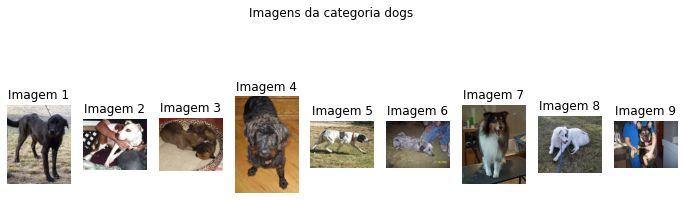

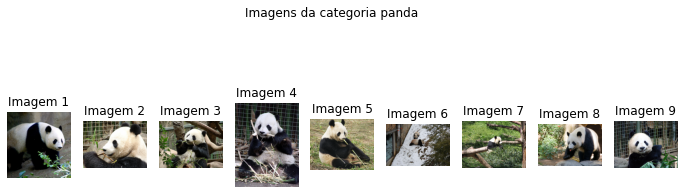

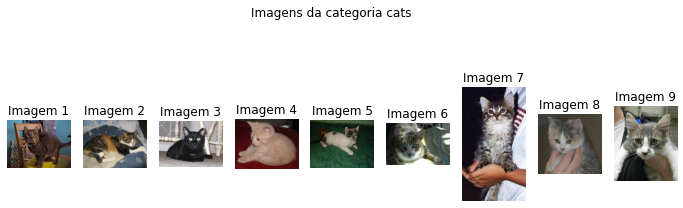

In [2]:
# Diretório onde as imagens estão armazenadas
dataset_path = os.path.join(os.getcwd(), 'datasets', 'animals')

# Categorias de animais
categorias = ['dogs', 'panda', 'cats']

# Número de imagens a serem exibidas por categoria
num_images_to_display = 9

# Loop para percorrer as categorias e exibir algumas imagens de cada categoria
for categoria in categorias:
    fig, axes = plt.subplots(1, num_images_to_display, figsize=(12, 4))
    fig.suptitle(f'Imagens da categoria {categoria}')
    
    # Diretório da categoria
    diretorio_categoria = os.path.join(dataset_path, categoria)
    imagens_categoria = os.listdir(diretorio_categoria)
    
    for i in range(num_images_to_display):
        # Carregar a imagem
        imagem = io.imread(os.path.join(diretorio_categoria, imagens_categoria[i]))
        axes[i].imshow(imagem)
        axes[i].set_title(f'Imagem {i+1}')
        axes[i].axis('off')
    
    plt.show()

In [3]:
# Lista para armazenar os atributos e rótulos
atributos = []
rotulos = []

# Loop para percorrer as categorias
for categoria in categorias:
    diretorio_categoria = os.path.join(dataset_path, categoria)
    for nome_arquivo in os.listdir(diretorio_categoria):
        # Caminho completo da imagem
        caminho_imagem = os.path.join(diretorio_categoria, nome_arquivo)
        # Carregar a imagem
        imagem = Image.open(caminho_imagem)
        
        print(imagem)
        
        # Calcular os atributos de textura
        atributos_textura = descritor_histograma(imagem)
        # Adicionar os atributos à lista
        atributos.append(atributos_textura)
        # Adicionar o rótulo de classe (0 para dogs, 1 para panda, 2 para cats)
        rotulos.append(categorias.index(categoria))

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=382x478 at 0x174B03662B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=321x260 at 0x174C9F69160>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x271 at 0x174C9FB40A0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=327x499 at 0x174CCAA4E20>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x260 at 0x174C9F69160>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x374 at 0x174CCAA4E20>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x400 at 0x174CE4D1F10>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x447 at 0x174CCAA4CD0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x374 at 0x174CE22B4F0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=499x375 at 0x174CE22B790>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=299x264 at 0x174CE22B4F0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=237x303 at 0x174CE22B310>
<PIL.JpegImagePlugin.JpegIma

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=422x500 at 0x174CD169940>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=301x342 at 0x174CD169B80>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=499x392 at 0x174CD169970>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=391x500 at 0x174CD1697C0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x331 at 0x174CD1699D0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=436x400 at 0x174CD169BB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=266x371 at 0x174CD1699D0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=499x333 at 0x174CD169FA0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=188x270 at 0x174CD169760>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=141x93 at 0x174CD169B80>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=296x399 at 0x174CD169760>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=399x462 at 0x174CD169FD0>
<PIL.JpegImagePlugin.JpegImag

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=373x500 at 0x174CE223550>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=499x375 at 0x174CE2236D0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=499x375 at 0x174CE223550>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=275x237 at 0x174CE2236D0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=440x500 at 0x174CE2237C0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=405x320 at 0x174CE223580>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=480x358 at 0x174CE223CD0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=305x204 at 0x174CE223DF0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=499x375 at 0x174CE223BB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=394x370 at 0x174CE223F10>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=399x400 at 0x174CE223B20>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=398x500 at 0x174CD158C40>
<PIL.JpegImagePlugin.JpegIma

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x174CE2055E0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333 at 0x174CE2055B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x174CE205190>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x174CE205280>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=594x402 at 0x174CE205040>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=454x500 at 0x174CE205280>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x174CE205040>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x174CE2052B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=783x500 at 0x174CE205400>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500 at 0x174CE205B80>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x174CE205280>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x174CE2055E0>
<PIL.JpegImagePlugin.JpegIma

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=468x500 at 0x174CD0FB6D0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x355 at 0x174CE20BE50>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=113x170 at 0x174CE20BA60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x174CE20BD00>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x419 at 0x174CD0FB6D0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x174CD0FB3A0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500 at 0x174CD0FBA30>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x174CD0FB3A0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x174CD0FB640>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x334 at 0x174CD0FB670>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x174CD0FB640>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x174CD0FBEB0>
<PIL.JpegImagePlugin.JpegIma

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500 at 0x174CD0BD0D0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x174CD0BD3A0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x334 at 0x174CD0BD0D0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x174CD0BD4C0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x332 at 0x174CD0BD5E0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x174CD0BD0A0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x326 at 0x174CD0BD5E0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x442 at 0x174CD0BD1F0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x387 at 0x174CD0BD070>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x174CD0BDF70>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x174CD0BDB20>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x174CD0BDFD0>
<PIL.JpegImagePlugin.JpegIma

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x374 at 0x174CCFE0460>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=480x359 at 0x174CCFE0490>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=499x440 at 0x174CCFE0550>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=499x313 at 0x174CCFE0490>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=321x499 at 0x174CCFE0100>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=299x225 at 0x174CCFE0040>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x374 at 0x174CCFE80D0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=261x499 at 0x174CCFE86D0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=378x500 at 0x174CCFE80D0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333 at 0x174CCFE8460>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=499x375 at 0x174CCFE87C0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x225 at 0x174CCFE86A0>
<PIL.JpegImagePlugin.JpegIma

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=387x499 at 0x174CD1A6F10>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x374 at 0x174CD1A6D00>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=359x270 at 0x174CD1A6CA0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=196x215 at 0x174CD1A6CD0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=359x500 at 0x174CD1A6280>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=215x323 at 0x174CD1A63D0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=499x376 at 0x174CD1A67C0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=336x426 at 0x174CD1A6FA0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=333x259 at 0x174CD1A63D0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=299x184 at 0x174CD1A6CA0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=414x319 at 0x174CD1A6640>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x374 at 0x174CD1A6AF0>
<PIL.JpegImagePlugin.JpegIma

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=376x499 at 0x174CD1761F0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=431x499 at 0x174CD176EE0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x332 at 0x174CD176EB0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=499x375 at 0x174CD176F10>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=477x444 at 0x174CD176130>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=398x400 at 0x174CD176310>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x335 at 0x174CD176F40>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=499x375 at 0x174CD176130>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x390 at 0x174CD176F40>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=499x298 at 0x174CD176E80>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=499x375 at 0x174CD176D30>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=172x269 at 0x174CD176F10>
<PIL.JpegImagePlugin.JpegIma

In [4]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(atributos, rotulos, test_size=0.3, random_state=42)

# Criar um classificador MLP (rede neural)
clf = MLPClassifier()
clf.fit(X_train, y_train)  # Treinar o classificador

# Realizar a predição no conjunto de teste
y_pred = clf.predict(X_test)

# Calcular a acurácia
acuracia = accuracy_score(y_test, y_pred)

# Exibir a acurácia
print(f'Acurácia da classificação: {acuracia:.2f}')

Acurácia da classificação: 0.34


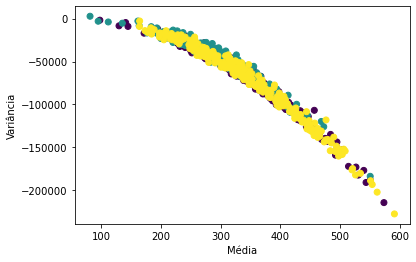

In [5]:
# Scatter plot dos atributos (apenas um exemplo)
plt.scatter([x[0] for x in atributos], [x[1] for x in atributos], c=rotulos, cmap='viridis')
plt.xlabel('Média')
plt.ylabel('Variância')
plt.show()

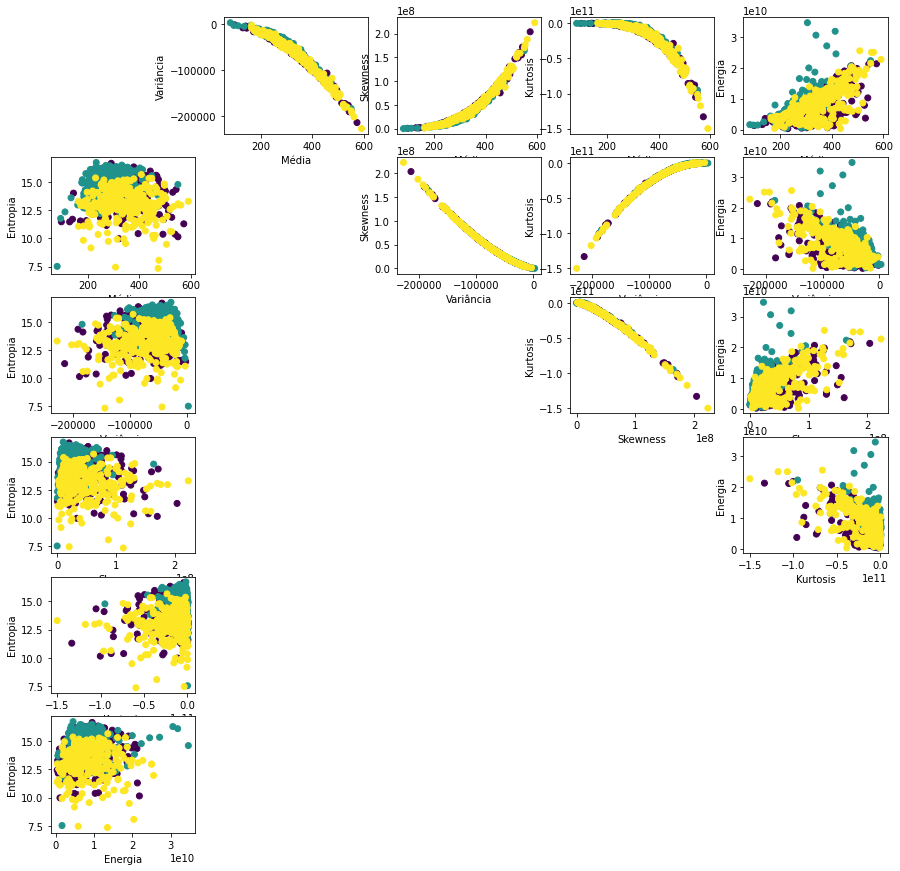

In [6]:
# Scatter plots dos atributos (combinando todos os pares)
atributos = np.array(atributos)
atributos_nomes = ["Média", "Variância", "Skewness", "Kurtosis", "Energia", "Entropia"]

# Plotar scatter plots de todos os pares de atributos
plt.figure(figsize=(15, 15))
for i in range(6):
    for j in range(i+1, 6):
        plt.subplot(6, 5, i*5 + j + 1)
        plt.scatter(atributos[:, i], atributos[:, j], c=rotulos, cmap='viridis')
        plt.xlabel(atributos_nomes[i])
        plt.ylabel(atributos_nomes[j])
plt.show()